# Example of CausticSNUpy usage

## 1. Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from causticsnupy.caustics import run_from_file, run_from_array

## 2. Set parameters.

1. Different parameters can yield slightly different results of caustics.
2. The resulting caustic lines may sometimes diverge near $r=0$ or may be unphysical. If so, try changing the grid size (`r_res` and `v_res`) or distance and velocity ranges (`v_lower`, `v_upper`, `r_max`).
3. Set `center_given` as `True` if you want to use the user-defined center of the cluster.    
    * If the first line only states the number of input galaxies, you MUST set `center_given` as `False`.
    * If the first line gives both the number of input galaxies and the cluster center coordinates, but you set `center_given` as `False`, it will ignore the coordinates given in the input.
    * the first line gives both the number of input galaxies and the cluster center coordinates, and you set `center_given` as `True`, it will fix the cluster coordinates to the the given coordinates.

In [2]:
fpath = 'test_data.txt'                         # your directory to the file; the given test data is of A2107, from Song et al. (2018)
                                                # https://ui.adsabs.harvard.edu/abs/2018ApJ...869..124S/abstract
                                                # In this example, the coordinates of the cluster center is fixed to the one given in the paper

v_lower = 8000                                  # lower bound of velocity that real members should have (km/s)
v_upper = 17000                                 # upper bound of velocity that real members should have (km/s)
v_max = 3000                                    # maximum l.o.s. velocity when drawing the redshift diagram
r_max = 3                                       # maximum projected distance from the center (Mpc)

H0 = 100
Om0 = 0.3
Ode0 = 0.7
Tcmb0 = 2.7

q = 25
r_res = 100                                     # resolution of r_grid
v_res = 100                                     # resolution of v_grid
BT_thr = "ALS"                                  # Binary Tree threshold
center_given = True                             # is center given in the first line of input file?

## 3. Run caustics.
There are two ways to run the caustic technique.
1. `run_from_file` function, which will read the input from `fpath`. See the `README.md` for information on the file formatting.
2. `run_from_array` function, which is basically the same as `run_from_file`, but the input is given as arrays instead of a file.

### 3-1. Input given as text file

In [3]:
result = run_from_file(fpath=fpath, v_lower=v_lower, v_upper=v_upper, v_max=v_max, r_max=r_max, center_given=center_given, H0=H0, Om0=Om0, Ode0=Ode0, Tcmb0=Tcmb0, q=q, r_res=r_res, v_res=v_res)

Hierarchical clustering done.
Number of candidate members : 299

Cluster center found in this code: RA = 234.86001 deg, Dec = 21.74430 deg, v = 12404 km/s, z = 0.041377
Using cluster center given by user.
Cluster center: RA = 234.98605 deg, Dec = 21.76340 deg, v = 12414 km/s, z = 0.041410

Mean clustercentric distance of candidate members:             0.88289 Mpc
Velocity Dispersion of candidate members within mean distance: 635.29690 km/s

Number of galaxies in velocity and r_max limit : 318
Estimating number density.
Calculating h_c.
Iteration   1, hc = 0.0050000: M_0 = 8.2701017e-04
Iteration   2, hc = 0.0150000: M_0 = 1.3341923e-04
Iteration   3, hc = 0.0250000: M_0 = 2.5855472e-05
Iteration   4, hc = 0.0350000: M_0 = -1.4584124e-05
Iteration   5, hc = 0.0450000: M_0 = -2.8887371e-05
Iteration   6, hc = 0.0550000: M_0 = -3.2073434e-05
Iteration   7, hc = 0.0650000: M_0 = -3.4140389e-05
Iteration   8, hc = 0.0750000: M_0 = -3.5588354e-05
Iteration   9, hc = 0.0850000: M_0 = -3.65315

### 3-2. Input given as variables

In [5]:
# Open file and assign variables
ra_cl, dec_cl, v_cl = np.loadtxt(fpath, max_rows=1, usecols=(1,2,3))
ra_gal, dec_gal, v_gal = np.loadtxt(fpath, skiprows=1, unpack=True)

''' The below line will result in an error, because the cluster center (ra_cl, dec_cl, v_cl) is not given while center_given=True '''
# result = run_from_array(ra_gal=ra_gal, dec_gal=dec_gal, v_gal=v_gal,
                        # v_lower=v_lower, v_upper=v_upper, v_max=v_max, r_max=r_max, center_given=center_given, H0=H0, Om0=Om0, Ode0=Ode0, Tcmb0=Tcmb0, q=q, r_res=r_res, v_res=v_res)

result = run_from_array(ra_gal=ra_gal, dec_gal=dec_gal, v_gal=v_gal,    # (RA, Dec, v) of galaxies as arrays
                        ra_cl=ra_cl, dec_cl=dec_cl, v_cl=v_cl,          # (RA, Dec, v) of the cluster center
                        v_lower=v_lower, v_upper=v_upper, v_max=v_max, r_max=r_max, center_given=center_given, H0=H0, Om0=Om0, Ode0=Ode0, Tcmb0=Tcmb0, q=q, r_res=r_res, v_res=v_res)   # other options are the same as run_from_file mode

Hierarchical clustering done.
Number of candidate members : 299

Cluster center found in this code: RA = 234.86001 deg, Dec = 21.74430 deg, v = 12404 km/s, z = 0.041377
Using cluster center given by user.
Cluster center: RA = 234.98605 deg, Dec = 21.76340 deg, v = 12414 km/s, z = 0.041410

Mean clustercentric distance of candidate members:             0.88289 Mpc
Velocity Dispersion of candidate members within mean distance: 635.29690 km/s

Number of galaxies in velocity and r_max limit : 318
Estimating number density.
Calculating h_c.
Iteration   1, hc = 0.0050000: M_0 = 8.2701017e-04
Iteration   2, hc = 0.0150000: M_0 = 1.3341923e-04
Iteration   3, hc = 0.0250000: M_0 = 2.5855472e-05
Iteration   4, hc = 0.0350000: M_0 = -1.4584124e-05
Iteration   5, hc = 0.0450000: M_0 = -2.8887371e-05
Iteration   6, hc = 0.0550000: M_0 = -3.2073434e-05
Iteration   7, hc = 0.0650000: M_0 = -3.4140389e-05
Iteration   8, hc = 0.0750000: M_0 = -3.5588354e-05
Iteration   9, hc = 0.0850000: M_0 = -3.65315

## 4. Draw the redshift diagram

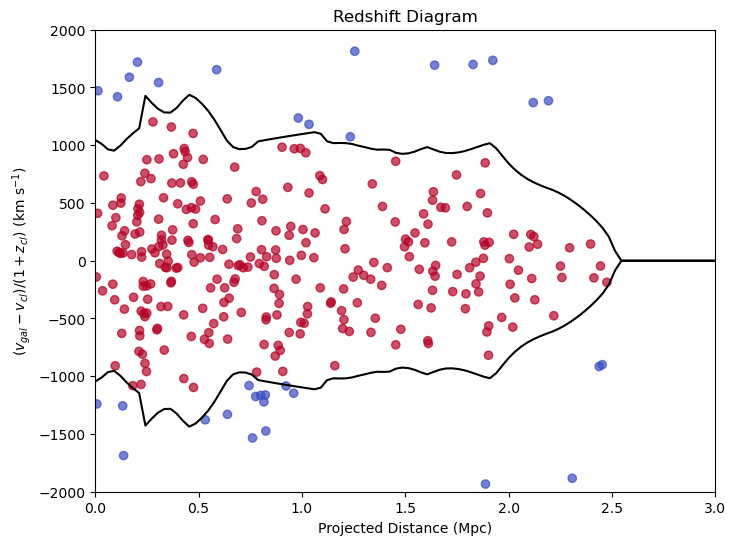

In [21]:
r_grid = result.r_grid       # grid of r-axis
A = result.A                 # Amplitude of caustics

r = result.r                 # Projected distance from cluster center to each galaxies
v = result.v                 # relative l.o.s velocities of galaxies
member = result.member       # boolean array of galaxies; 1 if member, 0 if not

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(r_grid,  A, c = 'k')
ax.plot(r_grid, -A, c = 'k')
ax.scatter(r, v, c=member, cmap='coolwarm', alpha=0.7)

ax.set_xlim(0, 3)
ax.set_ylim(-2000, 2000)

ax.set_title('Redshift Diagram')
ax.set_xlabel('Projected Distance (Mpc)')
ax.set_ylabel('$(v_{gal}-v_{cl})/(1+z_{cl})\\ \\rm{(km\\ s^{-1})}$')

plt.show()

## 5. Add a 4th column to the original data indicating the membership.

In [5]:
result.create_member_list('member_list.txt')     # create file as member_list.txt in the current directory

## 6. Mass Profile

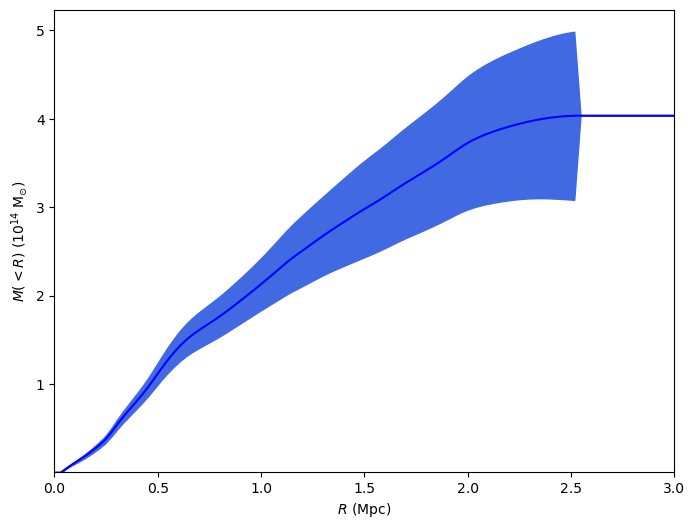

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(result.r_grid, result.M/1e14, c='blue')                   # mass profile in units of 10^14 M_sun
ax.fill_between(x=result.r_grid, y1=(result.M-result.dM)/1e14, y2=(result.M+result.dM)/1e14, color='royalblue')

ax.set_xlim(min(result.r_grid), max(result.r_grid))
ax.set_ylim(0.01)

ax.set_xlabel("$R\\ (\\rm{Mpc})$")
ax.set_ylabel("$M(<R)\\ (\\rm{10^{14}\\ M_{\\odot}}) $")

plt.show()

## 7. Additional: $\sigma$ Plateau

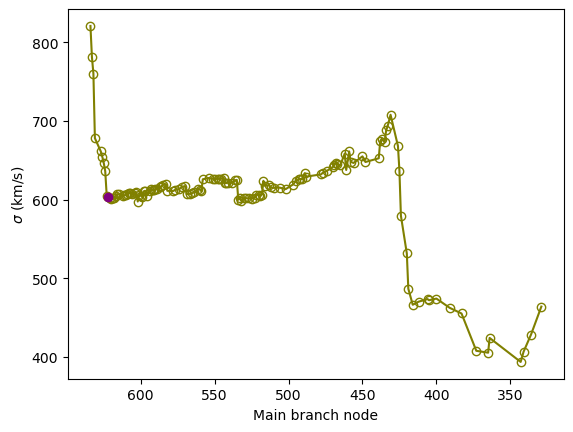

In [6]:
fig, ax = plt.subplots()

ax.plot(result.BT_mainbranch, result.BT_sigma, c='olive', marker='o', markerfacecolor='None')
ax.plot(result.BT_mainbranch[result.BT_cut_idx], result.BT_sigma[result.BT_cut_idx], c='purple', marker='o')    # this is where the binary tree is cut

ax.set_xlabel("Main branch node")
ax.set_ylabel("$\sigma$ (km/s)")

ax.invert_xaxis()

plt.show()